In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ny = pd.read_csv('NewYork_3.csv')
ny.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,ApprovalDate,...,JobsSupported,NaicsCode,NaicsDescription,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,CHRISTOPHER JAMES BENTLEY,492 Wendel Avenue,BUFFALO,NY,14223,1,CHGOFF,12000,6000,6/26/14,...,4,811122.0,Automotive Glass Replacement Shops,SBA EXPRES,FA$TRK (Small Loan Express),"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,84133
1,"CORK ON THE FORK, LLC",1 EAST CHURCH ST,FAIRPORT,NY,14450,2,PIF,800000,720000,3/11/10,...,1,722110.0,Full-Service Restaurants,OTH 7A,Guaranty,Xceed Financial FCU,888 N Nash St,EL SEGUNDO,CA,90245
2,WJC Cleaners Inc.,1089 3RD AVE,NEW YORK,NY,10065,4,EXEMPT,400000,300000,1/25/18,...,4,812320.0,Drycleaning and Laundry Services (except Coin-...,PLP,Guaranty,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,10001
3,"11 W 32, INC.","11 WEST 32ND STREET, 3&4 FL",NEW YORK,NY,10001,5,EXEMPT,1600000,1200000,1/16/18,...,5,722410.0,Drinking Places (Alcoholic Beverages),PLP,Guaranty,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,10001
4,"K2 YH, INC.","34 WEST 32ND STREET, 9FL",NEW YORK,NY,10001,6,EXEMPT,750000,562500,1/16/18,...,4,722410.0,Drinking Places (Alcoholic Beverages),PLP,Guaranty,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,10001


In [3]:
# ny =ny.dropna()

In [4]:
X = ny[["LoanStatus", "GrossApproval", "SBAGuarantee"]]
y = ny["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(24352, 3) (24352, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuarantee,LoanStatus_CANCLD,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,12000,6000,0,1,0,0,0
1,800000,720000,0,0,0,0,1
2,400000,300000,0,0,0,1,0
3,1600000,1200000,0,0,0,1,0
4,750000,562500,0,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,GrossApproval,SBAGuarantee,LoanStatus_CANCLD,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
24064,25000,12500,0,0,0,1,0
3336,200000,100000,0,0,0,0,1
21170,400000,300000,0,0,0,0,1
12630,250000,125000,0,0,0,0,1
8510,25000,12500,0,0,0,0,1


In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuarantee"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuarantee"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

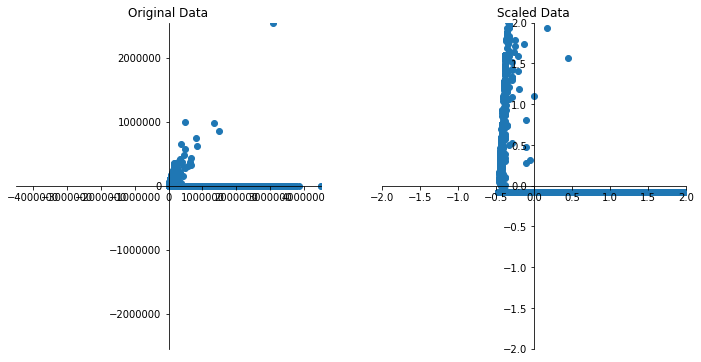

In [10]:
plt.show()

In [11]:
ny.corr()

,BorrZip,BorrID,GrossApproval,SBAGuarantee,ApprovalFiscalYear,COFiscalYear,InitialInterestRate,TermInMonths,COAmount,RevolverStatus,JobsSupported,NaicsCode,BankZip
BorrZip,1.000000,0.018246,-0.120227,-0.118605,-0.048414,0.076372,-0.242432,-0.090815,-0.010852,-0.042036,-0.007247,-0.098541,-0.321571
BorrID,0.018246,1.000000,-0.053968,-0.054430,-0.123511,-0.077794,-0.083558,-0.051815,0.002922,0.010940,0.014819,-0.029850,0.263539
GrossApproval,-0.120227,-0.053968,1.000000,0.996480,0.022777,0.126074,-0.217861,0.530289,0.040282,-0.269348,0.270400,0.050551,0.040769
SBAGuarantee,-0.118605,-0.054430,0.996480,1.000000,0.016107,0.105507,-0.210809,0.536848,0.041981,-0.280661,0.266055,0.054712,0.039973
ApprovalFiscalYear,-0.048414,-0.123511,0.022777,0.016107,1.000000,0.487176,0.083046,0.044161,-0.065601,0.083115,-0.087020,-0.007234,-0.092784
COFiscalYear,0.076372,-0.077794,0.126074,0.105507,0.487176,1.000000,-0.227796,-0.212819,0.099439,-0.014659,0.065848,-0.040272,-0.141379
InitialInterestRate,-0.242432,-0.083558,-0.217861,-0.210809,0.083046,-0.227796,1.000000,-0.163998,-0.013588,0.222378,-0.147704,0.022098,0.109849
TermInMonths,-0.090815,-0.051815,0.530289,0.536848,0.044161,-0.212819,-0.163998,1.000000,-0.059930,-0.281721,0.081864,0.121172,0.067968
COAmount,-0.010852,0.002922,0.040282,0.041981,-0.065601,0.099439,-0.013588,-0.059930,1.000000,-0.024595,0.040179,-0.008645,0.005491
RevolverStatus,-0.042036,0.010940,-0.269348,-0.280661,0.083115,-0.014659,0.222378,-0.281721,-0.024595,1.000000,-0.131827,-0.167454,0.002447


In [12]:
X = pd.get_dummies(ny[["GrossApproval", "SBAGuarantee", "LoanStatus"]])
y = ny["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuarantee,LoanStatus_CANCLD,LoanStatus_CHGOFF,LoanStatus_COMMIT,LoanStatus_EXEMPT,LoanStatus_PIF
0,12000,6000,0,1,0,0,0
1,800000,720000,0,0,0,0,1
2,400000,300000,0,0,0,1,0
3,1600000,1200000,0,0,0,1,0
4,750000,562500,0,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

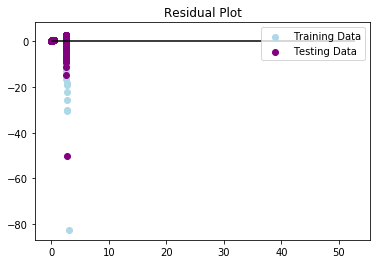

In [15]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="lightblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6509227382190875, R2: 0.2090942848578791
